## Introduction

A customer is interested in opening an Italian restaurant in Newyork city and wants to know the best neighborhood for this.
We will help him/her make the best decision with our datascience capabilities.

Obviously, we have to find out the neighborhoods that has least number of Italian restaurants or none at all.
We also will need location details of all the neighborhoods. Showing all these details in a map that will use the location details will be a best decision making tool!



In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

#!conda install -c conda-forge gmaps=0.9.0 --yes
#import gmaps
#import gmaps.datasets

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [2]:
#pip install openpyxl

<a id='item1'></a>


##  Dataset


We will need Neighborhood details like Boroughs, neighborhoods in each borough and their geo locations for this.
We will use these data to identify number of Italian restaurants per neighborhood. Based on this. we can then segment the neighborhoods by most to least promising ones.


For this exercise, I downloaded the NYC JSON from Skillsnetwork.


In [3]:
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')

Data downloaded!


#### Load and explore the data


Next, let's load the data.


In [4]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
#type(newyork_data)

In [5]:
neighborhoods_data = newyork_data['features']

Let's take a look at the first item in this list.


In [6]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

#### Tranform the data into a _pandas_ dataframe


In [7]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [8]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

Print resulting dataframe.


In [9]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


## Methodology

We will convert data into useable format, clean the data. We then will create interactive map of NYC with neighborhoods and show the number of existing Italian restaurants for each on pop-up.

Next we will cluster the neighborhoods by k-means based on number of Italian restaurants they have. Then generate an interactive map based on the cluster. We will also analyse each cluster seperately.This will the customer in decision making.

#### Use geopy library to get the latitude and longitude values of New York City.


In [10]:
address = 'New York City, NY'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.


#### Define Foursquare Credentials


In [11]:
import getpass
CLIENT_ID = getpass.getpass() # your Foursquare ID
CLIENT_SECRET = getpass.getpass()  # your Foursquare Secret
VERSION = '20190605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

 ················································
 ················································


<a id='item2'></a>


#### Let's create a function to find venues in all the neighborhoods in NYC


In [12]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    rating=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        #print(results)
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng,
            v['venue']['id'], 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
        #print(len(venues_list))
        #print(venues_list)
        # create the API request URL
        #ratingsurl = 'https://api.foursquare.com/v2/venues/{}/?&client_id={}&client_secret={}&v={}'.format(venues_list[3],CLIENT_ID,CLIENT_SECRET,VERSION)
        # GET ratings
        #rating = requests.get(ratingsurl).json()["response"]['venue']['rating']

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'NeighborhoodLatitude', 
                  'NeighborhoodLongitude',
                  'Venueid', 
                  'VenueName', 
                  'VenueLatitude', 
                  'VenueLongitude',
                  'VenueCategory']
    #nearby_venues['VenueRating'] = rating
    
    return(nearby_venues)

In [13]:
# NYC neighborhoods
ny_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

In [14]:
#url

#### Let's check the size of the resulting dataframe


In [15]:
print(ny_venues.shape)
ny_venues.head()

(10031, 8)


,Neighborhood,NeighborhoodLatitude,NeighborhoodLongitude,Venueid,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Wakefield,40.894705,-73.847201,4c537892fd2ea593cb077a28,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,4d6af9426107f04dedeb297a,Rite Aid,40.896649,-73.844846,Pharmacy
2,Wakefield,40.894705,-73.847201,5d5f5044d0ae1c0008f043c3,Walgreens,40.896528,-73.844700,Pharmacy
3,Wakefield,40.894705,-73.847201,4c783cef3badb1f7e4244b54,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
4,Wakefield,40.894705,-73.847201,4c25c212f1272d7f836385c5,Dunkin',40.890459,-73.849089,Donut Shop


In [16]:
#Italian Restaurant
IR_venues = ny_venues[ny_venues['VenueCategory']=='Italian Restaurant']
#IR_venues.shape
IR_venues.head()

,Neighborhood,NeighborhoodLatitude,NeighborhoodLongitude,Venueid,VenueName,VenueLatitude,VenueLongitude,VenueCategory
159,Woodlawn,40.898273,-73.867315,511edb6de4b0d58346fd272d,Patrizia's Of Woodlawn,40.900638,-73.867724,Italian Restaurant
244,Pelham Parkway,40.857413,-73.854756,4bf96ae65317a593d837017f,Enzo's,40.854232,-73.854362,Italian Restaurant
254,Pelham Parkway,40.857413,-73.854756,4b47f069f964a5208c4426e3,Pasta Pasta,40.854788,-73.854929,Italian Restaurant
267,City Island,40.847247,-73.786488,4514ed4df964a520e5391fe3,Artie's Steak and Seafood,40.849542,-73.787317,Italian Restaurant
296,Bedford Park,40.870185,-73.885512,4b1712a8f964a520dbc123e3,Jolly Tinker,40.867451,-73.883536,Italian Restaurant


In [17]:
#file_name = 'ny_venues.xlsx'
#ny_venues.to_excel(file_name) 
#print('Exported Excel File successfully.')

Let's check how many venues were returned for each neighborhood


In [18]:
IR_venuesgrouped =IR_venues.groupby('Neighborhood').count()
IR_venuesgrouped.head()

,NeighborhoodLatitude,NeighborhoodLongitude,Venueid,VenueName,VenueLatitude,VenueLongitude,VenueCategory
Neighborhood,,,,,,,
Arrochar,2,2,2,2,2,2,2
Astoria,2,2,2,2,2,2,2
Astoria Heights,1,1,1,1,1,1,1
Auburndale,2,2,2,2,2,2,2
Bath Beach,2,2,2,2,2,2,2


In [19]:
# merge IR_venuesgrouped with NYC neighborhoods.This gives Location for each neighborhood and Italian Restaurants in neighborhoods
ny_merged = pd.merge(neighborhoods,IR_venuesgrouped,how="left", on='Neighborhood')
ny_merged.head()

,Borough,Neighborhood,Latitude,Longitude,NeighborhoodLatitude,NeighborhoodLongitude,Venueid,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Bronx,Wakefield,40.894705,-73.847201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bronx,Co-op City,40.874294,-73.829939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bronx,Eastchester,40.887556,-73.827806,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bronx,Fieldston,40.895437,-73.905643,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bronx,Riverdale,40.890834,-73.912585,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#Keep only required data
ny_merged = ny_merged[['Borough','Neighborhood','Latitude','Longitude','VenueName']]
ny_merged.columns = ['Borough','Neighborhood','Latitude','Longitude','VenueCount']
ny_merged.head()

,Borough,Neighborhood,Latitude,Longitude,VenueCount
0,Bronx,Wakefield,40.894705,-73.847201,NaN
1,Bronx,Co-op City,40.874294,-73.829939,NaN
2,Bronx,Eastchester,40.887556,-73.827806,NaN
3,Bronx,Fieldston,40.895437,-73.905643,NaN
4,Bronx,Riverdale,40.890834,-73.912585,NaN


In [21]:
# Clean data. Replace NaN values with zeros
ny_merged_filled = ny_merged.fillna(0)
ny_merged_filled.head()

,Borough,Neighborhood,Latitude,Longitude,VenueCount
0,Bronx,Wakefield,40.894705,-73.847201,0.0
1,Bronx,Co-op City,40.874294,-73.829939,0.0
2,Bronx,Eastchester,40.887556,-73.827806,0.0
3,Bronx,Fieldston,40.895437,-73.905643,0.0
4,Bronx,Riverdale,40.890834,-73.912585,0.0


In [22]:
display(ny_merged_filled.dtypes)

Borough          object
Neighborhood     object
Latitude        float64
Longitude       float64
VenueCount      float64
dtype: object

In [23]:
# convert venues to int
ny_merged_filled['VenueCount'] = ny_merged_filled['VenueCount'].astype(int)
display(ny_merged_filled.dtypes)

Borough          object
Neighborhood     object
Latitude        float64
Longitude       float64
VenueCount        int64
dtype: object

In [24]:
ny_merged_filled.head()

,Borough,Neighborhood,Latitude,Longitude,VenueCount
0,Bronx,Wakefield,40.894705,-73.847201,0
1,Bronx,Co-op City,40.874294,-73.829939,0
2,Bronx,Eastchester,40.887556,-73.827806,0
3,Bronx,Fieldston,40.895437,-73.905643,0
4,Bronx,Riverdale,40.890834,-73.912585,0


In [25]:
venues_by_borough = ny_merged_filled.groupby(['Borough'],as_index=False).sum()
venues_by_borough.columns=['Borough','Latitude','Longitude','VenueCount']
venues_by_borough

,Borough,Latitude,Longitude,VenueCount
0,Bronx,2124.225053,-3841.418978,40
1,Brooklyn,2845.576249,-5176.709962,64
2,Manhattan,1630.497534,-2959.013164,122
3,Queens,3297.220358,-5979.754596,40
4,Staten Island,2557.097609,-4670.657086,47


<bound method Axes.plot of <AxesSubplot:title={'center':'Italian Restaurants by Borough'}, xlabel='Boroughs', ylabel='Italian Restaurants'>>

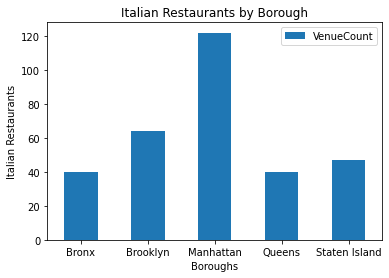

In [26]:
bar = venues_by_borough.plot.bar(x='Latitude',y='VenueCount',rot=0)
bar.set_title('Italian Restaurants by Borough')
bar.set_xlabel('Boroughs')
bar.set_ylabel('Italian Restaurants')
bar.set_xticklabels(venues_by_borough['Borough'],  fontsize=10)
bar.plot

In [27]:
#IR_venuesQueens = pd.merge(neighborhoods,IR_venues,how="left", on='Neighborhood')
#IR_venuesQueens = IR_venuesQueens[(IR_venuesQueens['Borough']=='Queens') & (IR_venuesQueens['VenueCategory']=='Italian Restaurant')]
IR_venuesQueens = pd.merge(neighborhoods,IR_venues, how="left", left_on=['Latitude','Longitude'], right_on=['NeighborhoodLatitude','NeighborhoodLongitude'])
IR_venuesQueens = IR_venuesQueens[(IR_venuesQueens['Borough']=='Queens')]
IR_venuesQueensCleaned = IR_venuesQueens.dropna()
IR_venuesQueensCleaned.head()

,Borough,Neighborhood_x,Latitude,Longitude,Neighborhood_y,NeighborhoodLatitude,NeighborhoodLongitude,Venueid,VenueName,VenueLatitude,VenueLongitude,VenueCategory
259,Queens,Astoria,40.768509,-73.915654,Astoria,40.768509,-73.915654,5010b169e4b05edd9983ec7d,Antika Restaurant & Pizzeria,40.764903,-73.917158,Italian Restaurant
260,Queens,Astoria,40.768509,-73.915654,Astoria,40.768509,-73.915654,4ebf0e380aaf6450ba608920,Via Trenta,40.764743,-73.916641,Italian Restaurant
262,Queens,Jackson Heights,40.751981,-73.882821,Jackson Heights,40.751981,-73.882821,4a82d6adf964a5206ff91fe3,Uncle Peter's,40.755786,-73.883810,Italian Restaurant
264,Queens,Howard Beach,40.654225,-73.838138,Howard Beach,40.654225,-73.838138,4bafdb5df964a52086263ce3,Prima Pasta & Cafe,40.654385,-73.839093,Italian Restaurant
265,Queens,Howard Beach,40.654225,-73.838138,Howard Beach,40.654225,-73.838138,4bae3bd0f964a52009963be3,Brothers Ravioli,40.655282,-73.838991,Italian Restaurant


### Lets look at the existing Italian restaurants.

This is an interactive map showing existing Italian restaurants

In [28]:
#nyc lat long#
#latitude=40.7127281;
#longitude=-74.0060152;
# create map of NYC using latitude and longitude values and diplay number of Italian Restaurants in Pop up of neighborhood
map_details = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, ngh in zip(IR_venues['VenueLatitude'], IR_venues['VenueLongitude'],  IR_venues['VenueName']):
    label = folium.Popup(ngh, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup= label,
        color='green',
        fill=True,
        fill_color=0.7,
        fill_opacity=0.7,
        parse_html=False).add_to(map_details)  
    
map_details

In [29]:
ny_merged.head()

,Borough,Neighborhood,Latitude,Longitude,VenueCount
0,Bronx,Wakefield,40.894705,-73.847201,NaN
1,Bronx,Co-op City,40.874294,-73.829939,NaN
2,Bronx,Eastchester,40.887556,-73.827806,NaN
3,Bronx,Fieldston,40.895437,-73.905643,NaN
4,Bronx,Riverdale,40.890834,-73.912585,NaN


In [30]:
# define the dataframe columns
col = ['venueid', 'venuerating']
# instantiate the dataframe
venue_ratingsQueens = pd.DataFrame(columns=col)

In [31]:
venue_ratingsQueens

,venueid,venuerating


In [32]:
#loops from 24th rec
#for index, row in IRonly_venuesQueens.iterrows():
#    url = 'https://api.foursquare.com/v2/venues/{}/?&client_id={}&client_secret={}&v={}'.format(
#            row['Venueid'],
#            CLIENT_ID,
#            CLIENT_SECRET,
#            VERSION)
#    try:
#        venue_ratingsQueens = venue_ratingsQueens.append({'venueid': requests.get(url).json()["response"]['venue']['id'],
#                                          'venuerating': requests.get(url).json()["response"]['venue']['rating']},ignore_index=True)
#    except:
#        venue_ratingsQueens = venue_ratingsQueens.append({'venueid': requests.get(url).json()["response"]['venue']['id'],
#                                          'venuerating': requests.get(url).json()["response"]['venue']['id']},ignore_index=True)
#    

In [33]:
#file_name = 'venue_ratingsQueens.xlsx'
#venue_ratingsQueens.to_excel(file_name)
#print('Exported Excel File successfully.')

In [34]:
neighborhoodsQueens = neighborhoods[neighborhoods['Borough']=='Queens']
neighborhoodsQueens.head()

,Borough,Neighborhood,Latitude,Longitude
129,Queens,Astoria,40.768509,-73.915654
130,Queens,Woodside,40.746349,-73.901842
131,Queens,Jackson Heights,40.751981,-73.882821
132,Queens,Elmhurst,40.744049,-73.881656
133,Queens,Howard Beach,40.654225,-73.838138


In [35]:
IR_venuesQueensCleaned = IR_venuesQueensCleaned[['Borough','Neighborhood_x','NeighborhoodLatitude','NeighborhoodLongitude','Venueid','VenueName','VenueLatitude','VenueLongitude','VenueCategory']]
IR_venuesQueensCleaned.head()

,Borough,Neighborhood_x,NeighborhoodLatitude,NeighborhoodLongitude,Venueid,VenueName,VenueLatitude,VenueLongitude,VenueCategory
259,Queens,Astoria,40.768509,-73.915654,5010b169e4b05edd9983ec7d,Antika Restaurant & Pizzeria,40.764903,-73.917158,Italian Restaurant
260,Queens,Astoria,40.768509,-73.915654,4ebf0e380aaf6450ba608920,Via Trenta,40.764743,-73.916641,Italian Restaurant
262,Queens,Jackson Heights,40.751981,-73.882821,4a82d6adf964a5206ff91fe3,Uncle Peter's,40.755786,-73.883810,Italian Restaurant
264,Queens,Howard Beach,40.654225,-73.838138,4bafdb5df964a52086263ce3,Prima Pasta & Cafe,40.654385,-73.839093,Italian Restaurant
265,Queens,Howard Beach,40.654225,-73.838138,4bae3bd0f964a52009963be3,Brothers Ravioli,40.655282,-73.838991,Italian Restaurant


In [36]:
IR_venuesQueensCount = IR_venuesQueensCleaned.groupby('Neighborhood_x',as_index=False).count()
IR_venuesQueensCount = IR_venuesQueensCount[['Neighborhood_x','VenueName']]
IR_venuesQueensCount.columns = ['Neighborhood','VenueCount']
IR_venuesQueensCount.head()

,Neighborhood,VenueCount
0,Astoria,2
1,Astoria Heights,1
2,Auburndale,2
3,Bayside,2
4,Beechhurst,1


In [37]:
#IR_venuesQueensmerge = pd.merge(left=neighborhoodsQueens, right=IR_venuesQueensCount, left_on='Neighborhood', right_on='Neighborhood')
IR_venuesQueensmerge = pd.merge(neighborhoodsQueens, IR_venuesQueensCount, on='Neighborhood', how='left')
IR_venuesQueensmerge = IR_venuesQueensmerge.fillna(0)
IR_venuesQueensmerge.head()

,Borough,Neighborhood,Latitude,Longitude,VenueCount
0,Queens,Astoria,40.768509,-73.915654,2.0
1,Queens,Woodside,40.746349,-73.901842,0.0
2,Queens,Jackson Heights,40.751981,-73.882821,1.0
3,Queens,Elmhurst,40.744049,-73.881656,0.0
4,Queens,Howard Beach,40.654225,-73.838138,3.0


In [38]:
#for index, row in IRonly_venuesQueens.iterrows():
#    if index >= 24:
#        url = 'https://api.foursquare.com/v2/venues/{}/?&client_id={}&client_secret={}&v={}'.format(
#            row['Venueid'],
#            CLIENT_ID,
#            CLIENT_SECRET,
#            VERSION)
#        try:
#            venue_ratingsQueens = venue_ratingsQueens.append({'venueid': requests.get(url).json()["response"]['venue']['id'],
#                                          'venuerating': requests.get(url).json()["response"]['venue']['rating']},ignore_index=True)
#        except:
#            venue_ratingsQueens = venue_ratingsQueens.append({'venueid': requests.get(url).json()["response"]['venue']['id'],
#                                          'venuerating': requests.get(url).json()["response"]['venue']['id']},ignore_index=True)
#    

In [39]:
#file_name = 'venue_ratingsQueens2.xlsx'
#venue_ratingsQueens.to_excel(file_name)
#print('Exported Excel File successfully.')

In [40]:
#url = 'https://api.foursquare.com/v2/venues/{}/?&client_id={}&client_secret={}&v={}'.format(
#            '511edb6de4b0d58346fd272d',
#            CLIENT_ID, 
#            CLIENT_SECRET, 
#            VERSION)
#r1 = requests.get(url).json()["response"]['venue']['rating']
#r1

In [41]:
pip install beautifulsoup4

     |████████████████████████████████| 122kB 5.1MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [42]:
from bs4 import BeautifulSoup
import pandas as pd
from urllib.request import urlopen
url = 'https://en.wikipedia.org/wiki/Boroughs_of_New_York_City'
html = urlopen(url) 
soup = BeautifulSoup(html, 'html.parser')
tables = soup.find_all('table',class_='wikitable sortable')

In [43]:
# create an Empty DataFrame object
Borough_population = pd.DataFrame(columns=['Borough','Population']) 
# Loop through html table rows, table data and append values into dataframe for valid Boroughs
for table in tables:
    rows = table.find_all('tr')
    for row in rows:
        cells = row.find_all('td')        
        if len(cells) > 1:
            if cells[1].text.strip() != "Not assigned":
                Borough_population = Borough_population.append({'Borough':cells[0].text.strip(),'Population':cells[2].text.strip()},ignore_index=True)

<a id='item3'></a>


In [44]:
Borough_population.at[0,'Borough']= 'Bronx'
Borough_population

,Borough,Population
0,Bronx,"1,418,207"
1,Brooklyn,"2,559,903"
2,Manhattan,"1,628,706"
3,Queens,"2,253,858"
4,Staten Island,"476,143"
5,City of New York,842.343
6,State of New York,"1,731.910"


In [45]:
IRdensity = pd.merge(venues_by_borough,Borough_population, on='Borough', how='left')
IRdensity = IRdensity[['Borough','VenueCount','Population']]
IRdensity['Population'] = IRdensity['Population'].str.replace(',','')
IRdensity['Population'] = IRdensity['Population'].astype(int)
IRdensity['Per_100thousand'] =(IRdensity['VenueCount']/(IRdensity['Population']/100000))
IRdensity

,Borough,VenueCount,Population,Per_100thousand
0,Bronx,40,1418207,2.820463
1,Brooklyn,64,2559903,2.500095
2,Manhattan,122,1628706,7.490609
3,Queens,40,2253858,1.774735
4,Staten Island,47,476143,9.870984


#### Based on density of Italian Restaurants per 100,000 population, we can say Queens Borough has the lowest numbers and greatest potential for opening another one.

In [46]:
def generateBaseMap(default_location=[40.7127281, -74.0060152], default_zoom_start=10):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map
#base_map = generateBaseMap()
#base_map

In [47]:
from folium.plugins import HeatMap
base_map = generateBaseMap()
#HeatMap(data=IR_venuesQueensmerge[['Latitude','Longitude','VenueCount']].values.tolist(), radius=11).add_to(base_map) #neighborhoods with # of IRs
HeatMap(data=IR_venuesQueensCleaned[['VenueLatitude','VenueLongitude']].values.tolist(), radius=11).add_to(base_map) #neighborhoods with # of IRs
base_map

### Onehot encode Neighborhoods data


In [48]:
# one hot encoding
ny_onehot = pd.get_dummies(IR_venuesQueensmerge[['VenueCount']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ny_onehot['Neighborhood'] = IR_venuesQueensmerge['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [ny_onehot.columns[-1]] + list(ny_onehot.columns[:-1])
ny_onehot = ny_onehot[fixed_columns]

ny_onehot.head()

,Neighborhood,VenueCount
0,Astoria,2.0
1,Woodside,0.0
2,Jackson Heights,1.0
3,Elmhurst,0.0
4,Howard Beach,3.0


Lets make sure we have all 81 neighborhoods


In [49]:
ny_onehot.shape

(81, 2)

#### Next, let's see number of unique Italian restaurant counts


In [50]:
print('There are {} uniques categories.'.format(len(ny_onehot['VenueCount'].unique())))

There are 5 uniques categories.


<a id='item4'></a>


### Cluster Neighborhoods based on number of existing Italian Restaurants


Run _k_-means to cluster the neighborhood into n clusters. We will determine n with elbow method first.


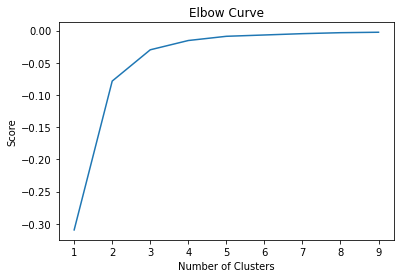

In [51]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = IR_venuesQueensmerge[['Latitude']]
X_axis = IR_venuesQueensmerge[['Longitude']]

score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [52]:
# set number of clusters
kclusters = 3

ny_grouped_clustering = ny_onehot.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ny_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:5] 

array([2, 1, 0, 1, 2], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.


In [53]:
# add clustering labels
IR_venuesQueensmerge.insert(0, 'Cluster Labels', kmeans.labels_)

In [54]:
IR_venuesQueensmerge.head()

,Cluster Labels,Borough,Neighborhood,Latitude,Longitude,VenueCount
0,2,Queens,Astoria,40.768509,-73.915654,2.0
1,1,Queens,Woodside,40.746349,-73.901842,0.0
2,0,Queens,Jackson Heights,40.751981,-73.882821,1.0
3,1,Queens,Elmhurst,40.744049,-73.881656,0.0
4,2,Queens,Howard Beach,40.654225,-73.838138,3.0


## Result

Based on location details and number of Italian restaurants already available, we are generating an interactive map that will group the nighborhoods and highlight them in different colors. The grouping is based on number of Italian restaurants available a key factor in our decision making. We will also analyze each group (cluster) in detail before we conculde.

Click on the neighborhoods (clustered by differect colors) to see number of existing Italian Restaurants

In [55]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = ('green','red','blue')
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,cnt in zip(IR_venuesQueensmerge['Latitude'], IR_venuesQueensmerge['Longitude'], IR_venuesQueensmerge['Neighborhood'], IR_venuesQueensmerge['Cluster Labels'], IR_venuesQueensmerge['VenueCount']):
    label = folium.Popup('ClusterId:'+str(cluster)+','+str(poi) +','+'Italian Restaurants:'+ str(cnt), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.6).add_to(map_clusters)
       
map_clusters

<a id='item5'></a>


### Examine each clusters


We can examine each cluster to see number Italian Restaurants that distinguish each cluster.

#### Neighborhoods where there is no Italian Restaurants. These are GREEN circle in the map above. These Neighborhoods are potentially best for opening Italian Restaurants.


In [56]:
IR_venuesQueensmerge.loc[IR_venuesQueensmerge['Cluster Labels'] == 1]

,Cluster Labels,Borough,Neighborhood,Latitude,Longitude,VenueCount
1,1,Queens,Woodside,40.746349,-73.901842,0.0
3,1,Queens,Elmhurst,40.744049,-73.881656,0.0
8,1,Queens,Richmond Hill,40.697947,-73.831833,0.0
10,1,Queens,Long Island City,40.750217,-73.939202,0.0
12,1,Queens,East Elmhurst,40.764073,-73.867041,0.0
15,1,Queens,Glendale,40.702762,-73.870742,0.0
17,1,Queens,Woodhaven,40.689887,-73.858110,0.0
18,1,Queens,Ozone Park,40.680708,-73.843203,0.0
19,1,Queens,South Ozone Park,40.668550,-73.809865,0.0
20,1,Queens,College Point,40.784903,-73.843045,0.0


In [57]:
ZeroIR = IR_venuesQueensmerge.loc[IR_venuesQueensmerge['Cluster Labels'] == 1]
ZeroIR.head()

,Cluster Labels,Borough,Neighborhood,Latitude,Longitude,VenueCount
1,1,Queens,Woodside,40.746349,-73.901842,0.0
3,1,Queens,Elmhurst,40.744049,-73.881656,0.0
8,1,Queens,Richmond Hill,40.697947,-73.831833,0.0
10,1,Queens,Long Island City,40.750217,-73.939202,0.0
12,1,Queens,East Elmhurst,40.764073,-73.867041,0.0


Latitude    40.693519
dtype: float64 Longitude   -73.815132
dtype: float64


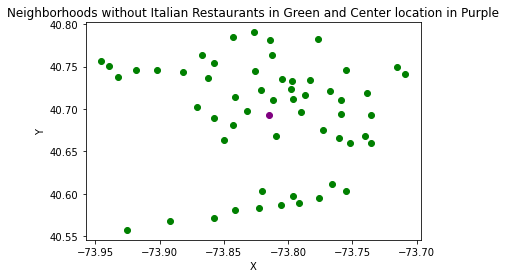

In [66]:
center = []
def findCenter(xList,yList,coordinates):
    xCenter = np.sum(xList)/len(xList)
    yCenter = np.sum(yList)/len(yList)
    coordinates.append(xCenter)
    coordinates.append(yCenter)
    return coordinates

findCenter(X,Y,center);

X = ZeroIR.iloc[:,4:5]
Y = ZeroIR.iloc[:,3:4]
plt.scatter(X,Y,label='Coordinates',color='green')
plt.scatter(center[0],center[1],label='Coordinates',color='purple')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Neighborhoods without Italian Restaurants in Green and Center location in Purple')
plt.show
print(center[1],center[0])

#### Neighborhoods having upto TWO Italian Restaurants. These neighborhoods, BLUE circles on map, might be profitable if customer decides to open another one.


In [74]:
IR_venuesQueensmerge.loc[IR_venuesQueensmerge['Cluster Labels'] == 1]

,Cluster Labels,Borough,Neighborhood,Latitude,Longitude,VenueCount
1,1,Queens,Woodside,40.746349,-73.901842,0.0
3,1,Queens,Elmhurst,40.744049,-73.881656,0.0
8,1,Queens,Richmond Hill,40.697947,-73.831833,0.0
10,1,Queens,Long Island City,40.750217,-73.939202,0.0
12,1,Queens,East Elmhurst,40.764073,-73.867041,0.0
15,1,Queens,Glendale,40.702762,-73.870742,0.0
17,1,Queens,Woodhaven,40.689887,-73.858110,0.0
18,1,Queens,Ozone Park,40.680708,-73.843203,0.0
19,1,Queens,South Ozone Park,40.668550,-73.809865,0.0
20,1,Queens,College Point,40.784903,-73.843045,0.0


In [73]:
IR_venuesQueensmerge.loc[IR_venuesQueensmerge['Cluster Labels'] == 0]

,Cluster Labels,Borough,Neighborhood,Latitude,Longitude,VenueCount
2,0,Queens,Jackson Heights,40.751981,-73.882821,1.0
5,0,Queens,Corona,40.742382,-73.856825,1.0
6,0,Queens,Forest Hills,40.725264,-73.844475,1.0
7,0,Queens,Kew Gardens,40.705179,-73.829819,1.0
9,0,Queens,Flushing,40.764454,-73.831773,1.0
13,0,Queens,Maspeth,40.725427,-73.896217,1.0
14,0,Queens,Ridgewood,40.708323,-73.901435,1.0
16,0,Queens,Rego Park,40.728974,-73.857827,1.0
25,0,Queens,Douglaston,40.766846,-73.742498,1.0
27,0,Queens,Bellerose,40.728573,-73.720128,1.0


#### Neighborhood having 3 OR MORE Italian Restaurants. These neighborhoods, RED circles on map, are not recommended.

In [72]:
IR_venuesQueensmerge.loc[IR_venuesQueensmerge['Cluster Labels'] == 2]

,Cluster Labels,Borough,Neighborhood,Latitude,Longitude,VenueCount
0,2,Queens,Astoria,40.768509,-73.915654,2.0
4,2,Queens,Howard Beach,40.654225,-73.838138,3.0
11,2,Queens,Sunnyside,40.740176,-73.926916,2.0
22,2,Queens,Bayside,40.766041,-73.774274,2.0
23,2,Queens,Auburndale,40.761730,-73.791762,2.0
24,2,Queens,Little Neck,40.770826,-73.738898,3.0
72,2,Queens,Hunters Point,40.743414,-73.953868,4.0


## Conclusion

From the interactive map above and each clusters, we identified the neighborhoods that does not have any existing Italian restaurants. These will be the most promising loactions for the customer.
